### Calculate Mean and StandardDeviation of Datasets

In [1]:
#general
import os
import numpy as np

#pytorch
import torch
import torchvision
import torchvision.transforms as T

#visualization
import matplotlib.pyplot as plt

In [2]:
#get the path to the traindata
os.listdir('./img_data/train/')

['Person', 'Scene']

In [3]:
#save train path in variable
train_set_path = './img_data/train/'

In [4]:
#basic transformations on images prior to calculation. Need to be the same as later for modeltraining!
train_trans = T.Compose([
    T.Resize([80,]),
    T.CenterCrop([80,]),
    T.ToTensor(),
])

In [5]:
#Create dataset
train_dataset = torchvision.datasets.ImageFolder(root=train_set_path, transform=train_trans)

In [6]:
#Load Images
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=32, shuffle=False, num_workers=4)

In [7]:
#Define function to calculate mean and std of dataset
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
    
    mean /= total_images_count
    std /= total_images_count
    
    return mean, std

In [8]:
# calculate mean and std for later
get_mean_and_std(train_loader)

(tensor([0.4939, 0.5189, 0.5326]), tensor([0.2225, 0.2362, 0.2674]))

In [9]:
#sneak into data, beacuse of curiosity
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels:', labels)

labels: tensor([1, 1, 1, 1, 0, 1])


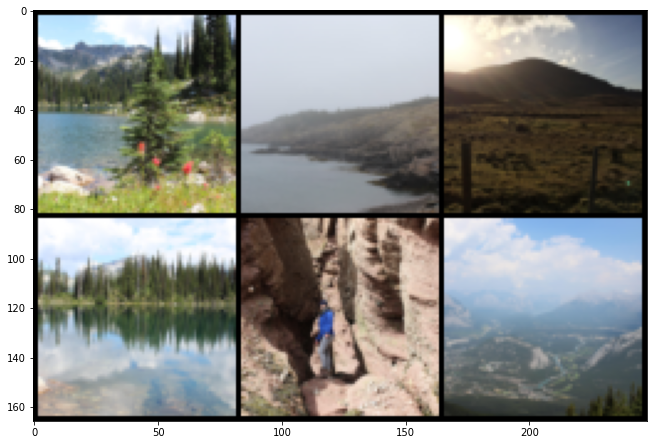

In [10]:
#peek a boo
show_transformed_images(train_dataset)